In [2]:
import math

In [6]:
# note: you must `pip install matplotlib` to use the line below
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Any time we work with information (variables, lists, dictionaries, numbers, strings, EVERYTHING) we are working with **objects**, because in Python, **everything** is an object.

In [7]:
a_number = 1
a_string = 'Hello!'
a_list = ['a', 'b']
a_dict = {'A': 1}
a_set = {1, 2, 3}
a_tuple = (1, 2, 3)
def a_function():
    return True

print(type(a_number))
print(type(a_string))
print(type(a_list))
print(type(a_dict))
print(type(a_set))
print(type(a_tuple))
print(type(a_function))


<class 'int'>
<class 'str'>
<class 'list'>
<class 'dict'>
<class 'set'>
<class 'tuple'>
<class 'function'>


A *class* is the type of an object. A class is like a blueprint for an object, whereas the *object* is the thing itself.

We can use `dir` on an object to see what kinds of things we can do with it

In [8]:
dir(a_set)

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

Everything starting with `__` is considered *private*. Nothing actually stops you from using them, but they aren't meant for public use. Sometimes they're also used indirectly. For instance, `__str__` is used if you pass an object into the `str()` function

In [9]:
str(a_set) # uses __str__ method

'{1, 2, 3}'

## Creating our own classes

We aren't just stuck with existing classes - we can create our own

Classes let us set standard expectatinos for our data

The other main reason we use classes is because objects can contain both *state* (information/data) and also *behavior*. When we keep our behavior and our state together, classes can be really useful.

**Any code that can be written with classes CAN BE WRITTEN WITHOUT THEM.** Sometimes classes can make things easier, though, because of the tight coupling between state and behavior.


In [11]:
class Person:
    
    # This method is called when we create a new Person object.
    # It's used to setup the initial state of the object.
    def __init__(self, name):
        self.name = name
    
    # self is the *implicit* parameter
    def greet(self):
        print("Hello, my name is {name}. It's nice to meet you!".format(name=self.name))

In [18]:
kendall = Person('Kendall')
kendall.greet()

person2 = Person('Gregory')
person2.greet()

kendall.greet()

print(person2.name)

Hello, my name is Kendall. It's nice to meet you!
Hello, my name is Gregory. It's nice to meet you!
Hello, my name is Kendall. It's nice to meet you!
Gregory


In [14]:
Person()

TypeError: __init__() missing 1 required positional argument: 'name'

In [34]:
class Clicker:
    "Counts up from 0"
    
    def __init__(self):
        self.count = 0
    
    def click(self):
        self.count += 1

In [36]:
my_clicker = Clicker()

print(my_clicker.count)

0


In [26]:
my_clicker.click()
print(my_clicker.count)

5


In [27]:
for _ in range(10):
    my_clicker.click()
print(my_clicker.count)

15


When we use dots after the name of a variable holding an object, there are basically two things we can get at:
* methods
* properties

`object.method()`

`object.property`

In [28]:
print(my_clicker.click)

<bound method Clicker.click of <__main__.Clicker object at 0x112ed50f0>>


In [30]:
x = lambda foo: foo > 0

In [31]:
x

<function __main__.<lambda>>

In [32]:
my_clicker.click = x

In [33]:
my_clicker.click()

TypeError: <lambda>() missing 1 required positional argument: 'foo'

In [37]:
x = my_clicker.click

In [38]:
x

<bound method Clicker.click of <__main__.Clicker object at 0x112efa1d0>>

In [42]:
x()

In [43]:
my_clicker.count


2

In [44]:
adams_clicker = Clicker()
my_clicker.count

2

In [47]:
adams_clicker.count

0

In [46]:
x()

In [48]:
my_clicker.count

3

Classes can have as many methods as we want

In [49]:
class Point:
    """A coordinate on a Cartesian plane."""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        """Calculate the distance between this point and another point."""
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
    
    def quadrant(self):
        """Calculates which quadrant of the Cartesian plane this point is in.
        
        Crude diagram:
        
          4  |  1
             |
        -----------
             |
          3  |  2
          
        For purposes of this calculation, zero counts as a positive number.
        """
        if x >= 0 and y >= 0:
            return 1
        elif x >= 0:
            return 2
        elif y < 0:
            return 3
        else:
            return 4
        
    def rotate(self, quarters=1):
        """Rotate the point around the center for some number of quarter turns."""
        if quarters is 1:
            return Point(self.y, -self.x)
        else:
            return Point(self.y, -self.x).rotate(quarters - 1)
    
    def __str__(self):
        """String representation of a point."""
        return "Point({}, {})".format(self.x, self.y)
    
    def __repr__(self):
        """Representation by Python output."""
        return self.__str__()

In [50]:
p1 = Point(3, 4)

In [51]:
p2 = Point(-2, 5)

In [52]:
p1.distance(p2)

5.0990195135927845

In [53]:
str(p1)

'Point(3, 4)'

In [54]:
print(p1)

Point(3, 4)


In [55]:
print(repr("It's tough to say \"Goodbye\""))


'It\'s tough to say "Goodbye"'


In [56]:
foo = Point(3, 4)

In [57]:
foo

Point(3, 4)

In [58]:
p1

Point(3, 4)

In [64]:
my_dictionary = {}
my_dictionary['a'] = 'apple'
my_dictionary['b'] = 'boat'

print(repr(my_dictionary))
new_d = eval(repr(my_dictionary))

{'a': 'apple', 'b': 'boat'}


In [65]:
new_d

{'a': 'apple', 'b': 'boat'}

In [80]:
class LineSegment:
    def __init__(self, pt1, pt2):
        self.p1 = pt1
        self.p2 = pt2
    
    def slope(self):
        return (self.p1.y - self.p2.y) / (self.p1.x - self.p2.x)
    
    def midpoint(self):
        x = (self.p1.x + self.p2.x) / 2
        y = (self.p1.y + self.p2.y) / 2
        return Point(x, y)
    
    def rotate(self, quarters=1):
        self.p1 = self.p1.rotate(quarters)
        self.p2 = self.p2.rotate(quarters)
    
    def __repr__(self):
        return 'LineSegment({}, {})'.format(self.p1, self.p2)
    

In [67]:
LineSegment(p1, p2)

LineSegment(Point(3, 4), Point(-2, 5))

In [68]:
foo = LineSegment(Point(3, 4), Point(-2, 5))

In [70]:
foo.midpoint()

Point(0.5, 4.5)

In [71]:
foo.slope()

-0.2

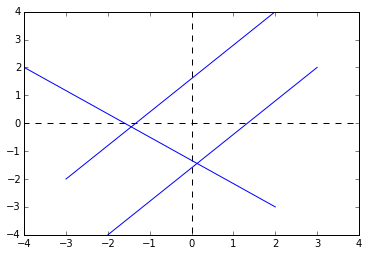

In [82]:
foo = LineSegment(Point(3, 2), Point(-2, -4))
plt.axis([-4, 4, -4, 4])
plt.plot([-5, 5], [0, 0], '--k')
plt.plot([0, 0], [-5, 5], '--k')
plt.plot([foo.p1.x, foo.p2.x], [foo.p1.y, foo.p2.y], '-b')
foo.rotate()
plt.plot([foo.p1.x, foo.p2.x], [foo.p1.y, foo.p2.y], '-b')
foo.rotate()
plt.plot([foo.p1.x, foo.p2.x], [foo.p1.y, foo.p2.y], '-b')


## Inheritance

*Inheritance* lets you create *subclasses* of a class - that is, a class that **inherits** all of the behavior and state from its *parent class*, and then adds OR overrides something of its own

Inheritance isn't always the right answer for a problem, but it can let us solve some problems more simply


In [87]:
class Person:
    def __init__(self, name, email):
        self.name = name
        self.email = email
    
    def greet(self):
        print("Hi, my name is {}".format(self.name))
    
class Teacher(Person):
    def __init__(self, name, email, subject):
        super().__init__(name, email)
        self.subject = subject
    
    def teach(self):
        print('blah blah blah i love {} blah blah blah'.format(self.subject))
    
me = Teacher('James', 'james.allen@theironyard.com', 'Python')
me.greet()
me.teach()

will = Person('Will', 'will@gmail.com')
will.greet()
will.teach()

Hi, my name is James
blah blah blah i love Python blah blah blah
Hi, my name is Will


AttributeError: 'Person' object has no attribute 'teach'

In [88]:
dir(Teacher)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'greet',
 'teach']

In [89]:
dir(me)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'email',
 'greet',
 'name',
 'subject',
 'teach']

In [90]:
type(me)

__main__.Teacher

In [91]:
print(type(me))

<class '__main__.Teacher'>


In [93]:
instanceof(Person, me)

NameError: name 'instanceof' is not defined

In [95]:
isinstance(me, Person)

True

In [96]:
isinstance(me, Teacher)

True

In [97]:
isinstance(me, Point)

False

`super()` is how we can access the parent class directly from the child/subclass

Multiple inheritance (that is, where we have more than one direct parent) is possible. We'll cover this when there's a compelling use case.

# Zed's Way

Zed Shaw in *Learn Python the Hard Way* has [a really good section on OO design](http://learnpythonthehardway.org/book/ex43.html).

1. Write or draw about the problem
2. Extract the key concepts from 1 and research them
3. Create a class hierarchy and object map for the concepts
4. Code the classes and tests to run them
5. Repeat and refine as necessary



In [105]:
class Person:
    def __init__(self, name, email, id):
        self.name = name
        self.email = email
        self.id = id

class Professor(Person):
    def __init__(self, name, email, id, tenure):
        super().__init__(name, email, id)
        self.tenure = tenure

class Student(Person):
    def __init__(self, name, email, id):
        super().__init__(name, email, id)

me = Professor('James', 'jallen', 5, .5)

Other paradigms/design patterns for OO design include

* SOLID
* RISE


In [99]:
help(id)

Help on built-in function id in module builtins:

id(...)
    id(object) -> integer
    
    Return the identity of an object.  This is guaranteed to be unique among
    simultaneously existing objects.  (Hint: it's the object's memory address.)



In [100]:
x = 45
id(x)

4550042192

In [101]:
y = 47
id(y)

4550042256

In [1]:
import re

old_print = print

def shout_print(s):
    s = re.sub(r'hello', 'HELLO', s)
    old_print(s)

print = shout_print

print('It is Thursday')
print('hello, nice to meet you')

It is Thursday
HELLO, nice to meet you


In [107]:
id(print)

4615923912

In [108]:
id(shout_print)

4615923912

In [2]:
id()

TypeError: id() takes exactly one argument (0 given)

In [3]:
__locals__

NameError: name '__locals__' is not defined

NameError: name '__main__' is not defined